## Import

In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.feature_selection import f_classif

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

from sklearn.metrics import plot_confusion_matrix, roc_curve, auc, classification_report, precision_score

import warnings
warnings.filterwarnings("ignore")

from IPython.display import display
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('../data/amzn_final_dataset.csv',index_col='AMZN')
df.dropna(inplace=True)
df['c_four_percent_high'] = df['c_four_percent_high'].map({'Buy': 1, '0': 0})

df = df.iloc[-1500:]
df

,Open,High,Low,Close,Volume,r_percent_increase_high,r_percent_increase_close,c_four_percent_high,SMA,SMA_diff,Stochastic,Stochastic_diff,rsi_up_var,rsi_down_var,RSI,RSI_diff,ROC,ROC_diff,tr,ATR,ATR_diff,pos_dx,neg_dx,dx,ADX,ADX_diff,rsi_over_80,rsi_over_70,rsi_over_60,rsi_under_40,rsi_under_30,rsi_under_20,sto_over_80,sto_over_70,sto_over_60,sto_under_40,sto_under_30,sto_under_20
AMZN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-02-26,384.07,389.3700,383.280,384.800,2687107.0,0.940281,0.787422,0,380.242778,0.847778,79.386558,-9.315036,0.000,0.570,61.718582,-6.986062,2.022960,-0.704021,6.0900,6.643564,-0.568571,0.00,6.74,0.402414,27.232643,-2.183747,0,0,1,0,0,0,0,1,1,0,0,0
2015-02-27,384.00,385.9900,379.790,380.160,2532309.0,2.172296,2.017572,0,380.057222,-0.185556,58.457375,-20.929184,0.000,4.640,55.787402,-5.931181,-0.437367,-2.460328,6.2000,6.730714,0.087150,0.00,0.00,14.285714,26.436281,-0.796362,0,0,0,0,0,0,0,0,0,0,0,0
2015-03-02,380.85,385.9000,379.481,385.655,2139205.0,0.716495,0.563976,0,381.193333,1.136111,82.190796,23.733421,5.495,0.000,64.355682,8.568281,2.723544,3.160911,6.4190,6.674214,-0.056500,0.00,0.00,14.285714,25.755682,-0.680599,0,0,1,0,0,0,1,1,1,0,0,0
2015-03-03,383.95,386.1000,381.601,384.610,1946498.0,0.990146,0.837212,0,382.442222,1.248889,73.946360,-8.244436,0.000,1.045,61.346097,-3.009585,3.010419,0.286875,4.4990,6.582000,-0.092214,0.00,2.12,11.675127,25.640397,-0.115285,0,0,1,0,0,0,0,1,1,0,0,0
2015-03-04,385.71,387.9000,382.190,382.720,2259141.0,1.488869,1.335180,0,382.856111,0.413889,60.179641,-13.766719,0.000,1.890,57.441586,-3.904511,0.982863,-2.027556,5.7100,6.561286,-0.020714,1.80,0.00,9.112014,24.100009,-1.540388,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-02-03,3425.01,3434.0000,3308.620,3312.530,7088781.0,1.946247,1.196065,0,3291.574444,0.615556,64.150164,-21.494964,0.000,67.470,60.714286,-8.863149,0.167524,-3.406072,125.3800,88.029586,4.018571,6.26,0.00,0.867212,17.325803,-0.145051,0,0,1,0,0,0,0,0,1,0,0,0
2021-02-04,3330.00,3347.0000,3277.750,3331.000,3670661.0,1.380967,0.634944,0,3295.882222,4.307778,69.601275,5.451111,18.470,0.000,65.317519,4.603233,1.177621,1.010097,69.2500,88.875307,0.845721,0.00,0.00,0.867212,17.273923,-0.051880,0,0,1,0,0,0,0,0,1,0,0,0
2021-02-05,3319.00,3377.0000,3302.710,3352.150,3620808.0,0.383333,-0.871381,0,3302.343333,6.461111,75.784024,6.182749,21.150,0.000,68.715084,3.397565,1.765331,0.587710,74.2900,90.797807,1.922500,30.00,0.00,5.519249,17.554331,0.280408,0,0,1,0,0,0,0,1,1,0,0,0


## Train/Test Split

In [3]:
y = df['c_four_percent_high']

# x = df[['SMA', 'Stochastic','RSI', 'ROC', 'ATR', 'ADX',
#        'ADX_diff', 'SMA_diff', 'Stochastic_diff', 'RSI_diff', 'ROC_diff', 'ATR_diff',
#        'rsi_over_80','rsi_over_70','rsi_over_60','rsi_under_40','rsi_under_30','rsi_under_20',
#        'Open', 'High', 'Low', 'Close'
#        ]]

x = df[['SMA', 'ROC', 'ATR', 'ADX',
        'High', 'Close'
       ]]



x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.2,
                                                    random_state = 790)

## Anova Statistical Test

In [4]:
#this creates arrays for f values and p values
f_clf = f_classif(x, y)

#create a series for easy visuals
p_values = pd.Series(f_clf[1])

#adding column names to the p-values
p_values.index = x.columns
p_values.sort_values(ascending=True, inplace=True)
p_values

ATR      2.630831e-13
SMA      3.911463e-04
High     5.379997e-04
Close    7.109820e-04
ADX      2.288786e-03
ROC      2.321921e-03
dtype: float64

## Decision Tree

In [5]:
dtc = DecisionTreeClassifier(criterion='gini',
                             max_depth=4,
                             min_samples_leaf=6,
                             min_samples_split=2)
dtc.fit(x_train, y_train)
y_preds = dtc.predict(x_test)

In [6]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.72      0.98      0.83       202
           1       0.84      0.21      0.34        98

    accuracy                           0.73       300
   macro avg       0.78      0.60      0.59       300
weighted avg       0.76      0.73      0.67       300



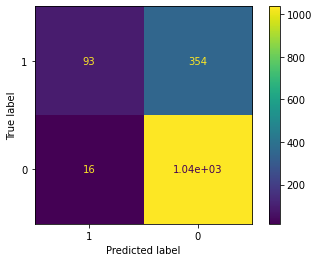

In [7]:
plot_confusion_matrix(dtc, x, y, values_format='.3g', labels = [1,0]);

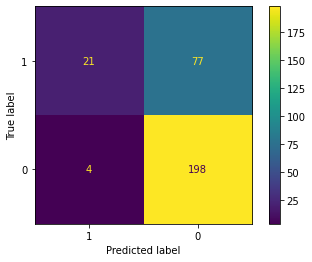

In [8]:
plot_confusion_matrix(dtc, x_test, y_test, values_format='.3g', labels = [1,0]);

In [9]:
total = 21 + 77+ 4 + 198
21 / total

0.07

### feature importances

In [10]:
df_imp = pd.DataFrame(data={'features': x_train.columns, 'importance': dtc.feature_importances_})
df_imp = df_imp.sort_values('importance', ascending=False)
df_imp = df_imp.reset_index()
df_imp.drop('index', axis=1, inplace=True)
df_imp.head(10)

,features,importance
0,High,0.349440
1,ATR,0.277382
2,SMA,0.177494
3,ADX,0.079555
4,ROC,0.076901
5,Close,0.039228


### misclassified data

In [11]:
a = pd.DataFrame()

for i in range(len(y_preds)):
    if y_preds[i] != y_test[i]:
        a = a.append(x_test.iloc[i])

In [12]:
a

,ADX,ATR,Close,High,ROC,SMA
2017-03-27,16.709073,8.218921,846.82,850.3000,-0.669771,849.637778
2015-10-14,21.451505,17.151879,544.83,552.2500,4.630128,541.391111
2018-07-23,45.349169,31.065000,1802.00,1819.0000,3.380817,1811.406667
2017-04-24,12.348168,13.201893,907.41,909.9900,0.040792,899.581111
2020-10-02,16.246864,101.355150,3125.00,3195.7965,5.557563,3117.521111
...,...,...,...,...,...,...
2020-05-01,14.518211,99.466429,2286.04,2362.4400,-4.494049,2369.345556
2015-06-15,29.946621,6.611429,423.67,428.0500,-1.698415,428.958889
2020-08-24,18.278600,80.068957,3307.46,3380.3150,7.361710,3235.134444
2017-07-24,18.067488,14.973514,1038.95,1043.0100,4.508465,1018.181111


In [13]:
len(y_preds)

300

In [14]:
a['ADX'].value_counts()

25.114454    1
23.102244    1
15.730679    1
13.576434    1
29.946621    1
            ..
55.701872    1
60.626117    1
34.074398    1
41.765202    1
20.808787    1
Name: ADX, Length: 81, dtype: int64

## test

y = df['c_four_percent_high']

x = df[['SMA', 'ROC', 'ATR', 'ADX',
        'High', 'Low', 'Close'
       ]]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 896)

dtc = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_leaf=1, min_samples_split=2)
dtc.fit(x_train, y_train)
y_preds = dtc.predict(x_test)

print(classification_report(y_test, y_preds))

Stochastic, RSI, Open, all diff and rsi-binning features did not impact this model in the slightest, I will be deleting these for the final model.

### ada boost

In [31]:
ada = AdaBoostClassifier(base_estimator=dtc, learning_rate=0.001, n_estimators=25)
ada.fit(x_train, y_train)

y_preds = ada.predict(x_test)
y_preds_train = ada.predict(x_train)


print(classification_report(y_test, y_preds))

print(precision_score(y_train, y_preds_train))
print(precision_score(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.72      0.98      0.83       202
           1       0.84      0.21      0.34        98

    accuracy                           0.73       300
   macro avg       0.78      0.60      0.59       300
weighted avg       0.76      0.73      0.67       300

0.8571428571428571
0.84


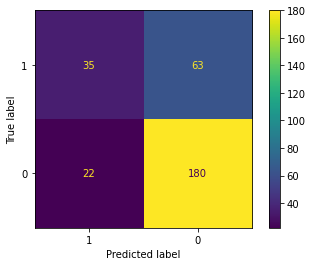

In [16]:
plot_confusion_matrix(ada, x_test, y_test, values_format='.3g', labels = [1,0]);

## Gradient Boosting

In [30]:
grad_boost = GradientBoostingClassifier(init=dtc,
                                        criterion='friedman_mse',
                                        learning_rate=.001,
                                        loss='deviance',
                                        n_estimators=30)

grad_boost.fit(x_train, y_train)

y_preds = grad_boost.predict(x_test)
y_preds_train = grad_boost.predict(x_train)

print(classification_report(y_test, y_preds))

print(precision_score(y_train, y_preds_train))
print(precision_score(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.72      0.98      0.83       202
           1       0.84      0.21      0.34        98

    accuracy                           0.73       300
   macro avg       0.78      0.60      0.59       300
weighted avg       0.76      0.73      0.67       300

0.8571428571428571
0.84


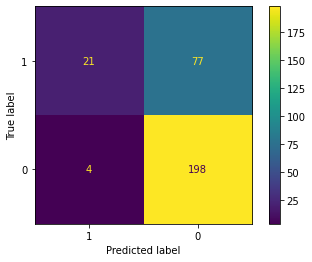

In [26]:
plot_confusion_matrix(grad_boost, x_test, y_test, values_format='.3g', labels = [1,0]);